Context

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

Data

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into two classes:

* Normal
* Suspect

https://geekymedics.com/how-to-read-a-ctg/ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn import preprocessing
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Train test split function
from sklearn.model_selection import train_test_split

## Importing the liabrary to run the regression model
import statsmodels.api as sm

## Importing the liabrary to view the diagnostic summaries of the model
import sklearn.metrics as metrics


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

from sklearn.inspection import permutation_importance

# EDA 

In [2]:
df = pd.read_csv('fetal_health.csv')
df.head(5)
df.shape

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,1


(2126, 22)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

In [4]:
df.isna().apply(sum, axis = 0)

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

# Raw variables Exploration 

<AxesSubplot:xlabel='baseline value', ylabel='Count'>

Text(0.5, 1.0, 'baseline value')

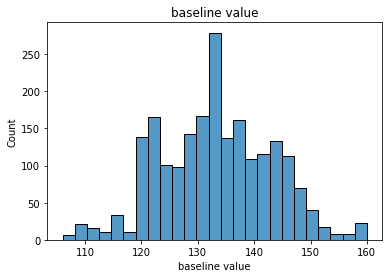

<AxesSubplot:xlabel='accelerations', ylabel='Count'>

Text(0.5, 1.0, 'accelerations')

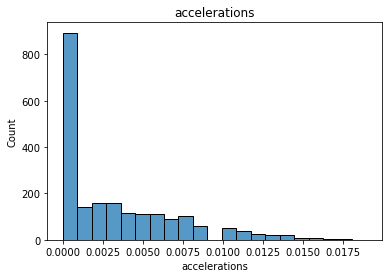

<AxesSubplot:xlabel='fetal_movement', ylabel='Count'>

Text(0.5, 1.0, 'fetal_movement')

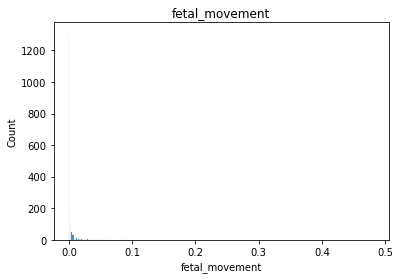

<AxesSubplot:xlabel='uterine_contractions', ylabel='Count'>

Text(0.5, 1.0, 'uterine_contractions')

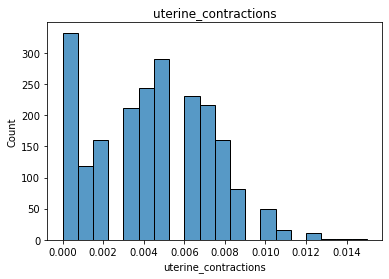

<AxesSubplot:xlabel='light_decelerations', ylabel='Count'>

Text(0.5, 1.0, 'light_decelerations')

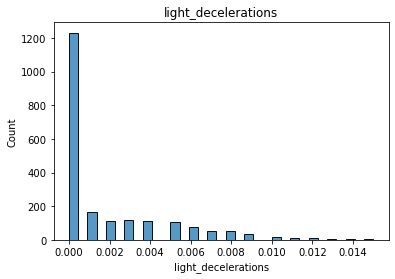

<AxesSubplot:xlabel='severe_decelerations', ylabel='Count'>

Text(0.5, 1.0, 'severe_decelerations')

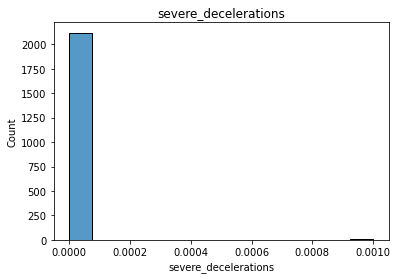

<AxesSubplot:xlabel='prolongued_decelerations', ylabel='Count'>

Text(0.5, 1.0, 'prolongued_decelerations')

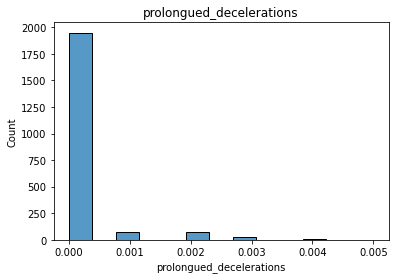

<AxesSubplot:xlabel='abnormal_short_term_variability', ylabel='Count'>

Text(0.5, 1.0, 'abnormal_short_term_variability')

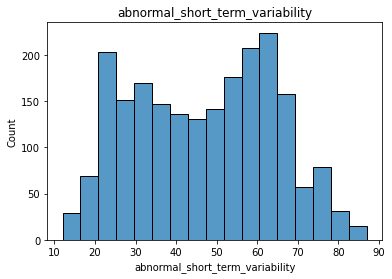

<AxesSubplot:xlabel='mean_value_of_short_term_variability', ylabel='Count'>

Text(0.5, 1.0, 'mean_value_of_short_term_variability')

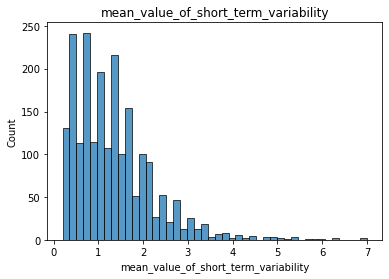

<AxesSubplot:xlabel='percentage_of_time_with_abnormal_long_term_variability', ylabel='Count'>

Text(0.5, 1.0, 'percentage_of_time_with_abnormal_long_term_variability')

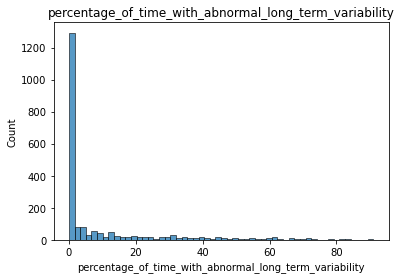

<AxesSubplot:xlabel='mean_value_of_long_term_variability', ylabel='Count'>

Text(0.5, 1.0, 'mean_value_of_long_term_variability')

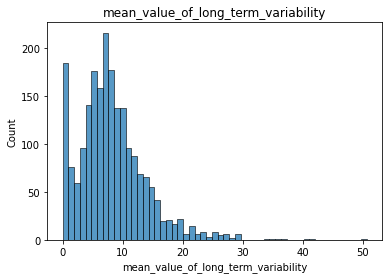

<AxesSubplot:xlabel='histogram_width', ylabel='Count'>

Text(0.5, 1.0, 'histogram_width')

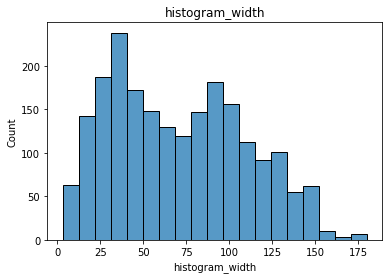

<AxesSubplot:xlabel='histogram_min', ylabel='Count'>

Text(0.5, 1.0, 'histogram_min')

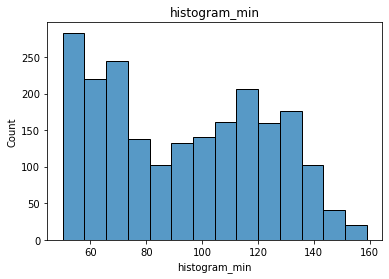

<AxesSubplot:xlabel='histogram_max', ylabel='Count'>

Text(0.5, 1.0, 'histogram_max')

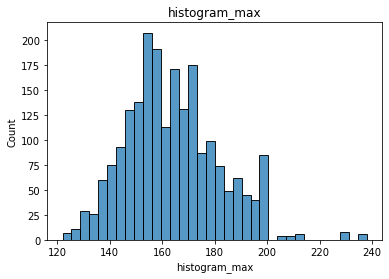

<AxesSubplot:xlabel='histogram_number_of_peaks', ylabel='Count'>

Text(0.5, 1.0, 'histogram_number_of_peaks')

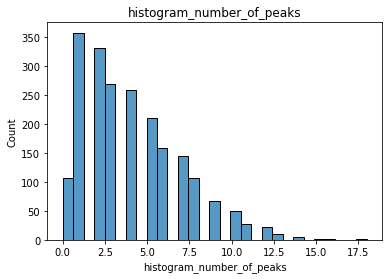

<AxesSubplot:xlabel='histogram_number_of_zeroes', ylabel='Count'>

Text(0.5, 1.0, 'histogram_number_of_zeroes')

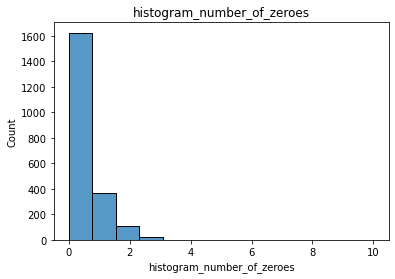

<AxesSubplot:xlabel='histogram_mode', ylabel='Count'>

Text(0.5, 1.0, 'histogram_mode')

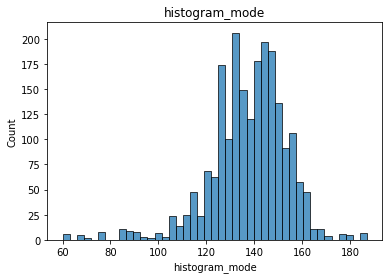

<AxesSubplot:xlabel='histogram_mean', ylabel='Count'>

Text(0.5, 1.0, 'histogram_mean')

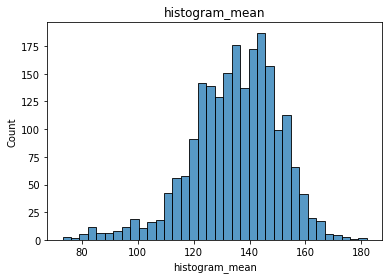

<AxesSubplot:xlabel='histogram_median', ylabel='Count'>

Text(0.5, 1.0, 'histogram_median')

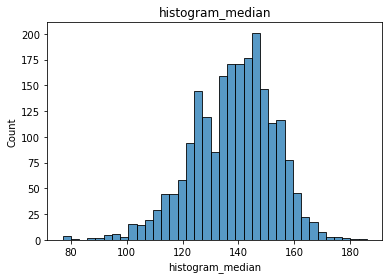

<AxesSubplot:xlabel='histogram_variance', ylabel='Count'>

Text(0.5, 1.0, 'histogram_variance')

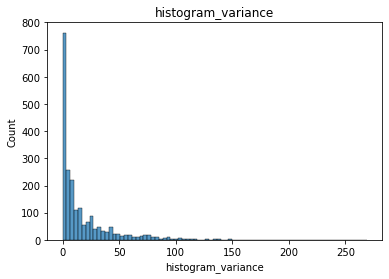

<AxesSubplot:xlabel='histogram_tendency', ylabel='Count'>

Text(0.5, 1.0, 'histogram_tendency')

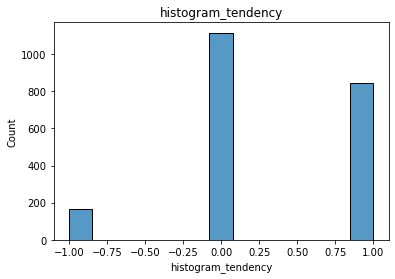

<AxesSubplot:xlabel='fetal_health', ylabel='Count'>

Text(0.5, 1.0, 'fetal_health')

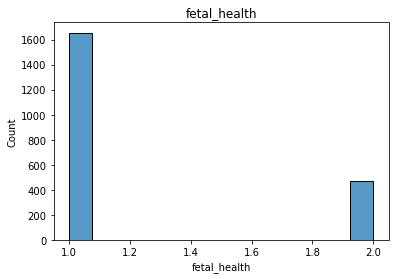

In [5]:
for x in df.columns:
    sn.histplot(df[x])
    plt.title(x)
    plt.show()
    

In [6]:
## Class distribution
df['fetal_health'].value_counts(normalize = True) ##80 20: not very imbalanced

1    0.778457
2    0.221543
Name: fetal_health, dtype: float64

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

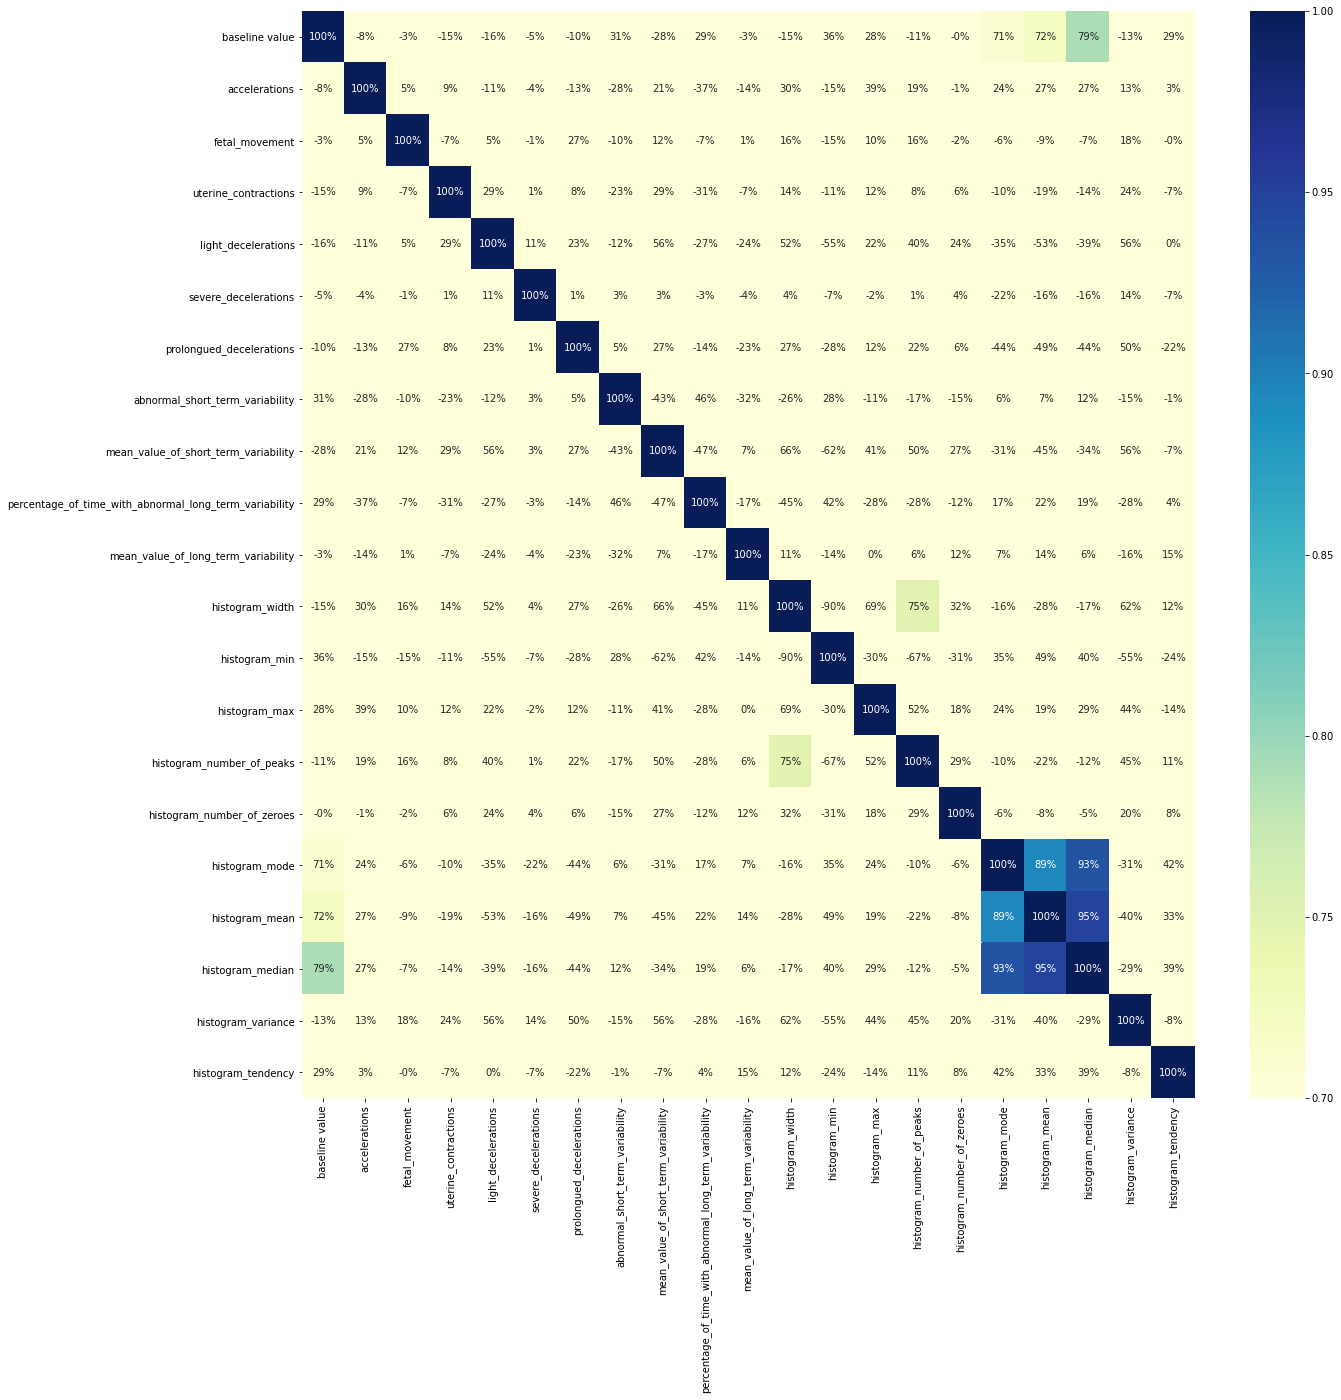

In [7]:
## Our dataset has a lot of variables, which are majorly dominated by the pattern of histogram.
## We suspect that there must be a lot of correlated variables
plt.figure(figsize = (20,20))
cols = df.columns
correll_plot_vars = [x for x in cols if x not in ['fetal_health']]
sn.heatmap(df.loc[:,correll_plot_vars].corr(), annot = True, fmt = '0.0%', vmin = 0.7, cmap = 'YlGnBu')

There is certainly high correlation between mean, median and mode, we can drop two of these three variables as they capture the same information  

In [8]:
#3 Dropping mean and median as these variables are correlated with the baseline as well
## We will call this as first obvious elimination
drop_vars = ['histogram_median','fetal_health']
vif_vars = [x for x in cols if x not in drop_vars]

## For the remaining variables we will check the variance inflation factor to address non-obvious correlations

## Checking the VIFs to assess dependence of all X variables
## Now, we have a lot of variabls, we will need to select important features
## Let's check the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df_int = df.drop(drop_vars, axis = 1)
## Creating and storing in a dataframe
vif_df = pd.DataFrame({ 'columns': vif_df_int.columns,
                          'VIF': [variance_inflation_factor(vif_df_int.to_numpy() , i) for i in range(len(vif_df_int.columns))]
                      })
vif_df.sort_values('VIF' , ascending= False).head(10)
#correlated_features = vif_df.loc[vif_df['VIF']>4, 'columns'].tolist()


C:\Users\arora\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,columns,VIF
11,histogram_width,inf
13,histogram_max,inf
12,histogram_min,inf
17,histogram_mean,1150.248307
0,baseline value,923.943113
16,histogram_mode,470.576981
7,abnormal_short_term_variability,15.796705
8,mean_value_of_short_term_variability,9.425245
14,histogram_number_of_peaks,6.862846
10,mean_value_of_long_term_variability,6.244875


In [9]:
## We can see that some of the columns have inf. VIF meaning, there is perfect multicolliniearity in the data
## Let's remove these variables first and rerun VIF iteratively
#3 Dropping mean and median as these variables are correlated with the baseline as well
## We will call this as first obvious elimination
drop_vars = ['histogram_mean','histogram_median','fetal_health', 'histogram_max', 'baseline value', 'histogram_mode',
            'histogram_width', 'histogram_min','mean_value_of_short_term_variability']
vif_vars = [x for x in cols if x not in drop_vars]

## For the remaining variables we will check the variance inflation factor to address non-obvious correlations

## Checking the VIFs to assess dependence of all X variables
## Now, we have a lot of variabls, we will need to select important features
## Let's check the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df_int = df.drop(drop_vars, axis = 1)
## Creating and storing in a dataframe
vif_df = pd.DataFrame({ 'columns': vif_df_int.columns,
                          'VIF': [variance_inflation_factor(vif_df_int.to_numpy() , i) for i in range(len(vif_df_int.columns))]
                      })
vif_df.sort_values('VIF' , ascending= False).head(10)
final_features = vif_df.loc[:,'columns'].tolist()
print(final_features)
print("\n # Features have been reduced to {}".format(len(final_features)))

,columns,VIF
6,abnormal_short_term_variability,5.687427
9,histogram_number_of_peaks,4.517473
2,uterine_contractions,3.245226
11,histogram_variance,3.188982
8,mean_value_of_long_term_variability,3.061301
3,light_decelerations,2.852898
0,accelerations,2.262674
7,percentage_of_time_with_abnormal_long_term_var...,2.139633
5,prolongued_decelerations,1.858197
12,histogram_tendency,1.417826


['accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_variance', 'histogram_tendency']

 # Features have been reduced to 13


<AxesSubplot:xlabel='accelerations', ylabel='Density'>

<AxesSubplot:xlabel='accelerations', ylabel='Density'>

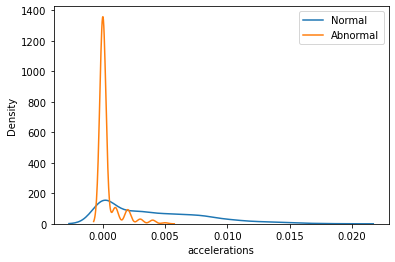

<AxesSubplot:xlabel='fetal_movement', ylabel='Density'>

<AxesSubplot:xlabel='fetal_movement', ylabel='Density'>

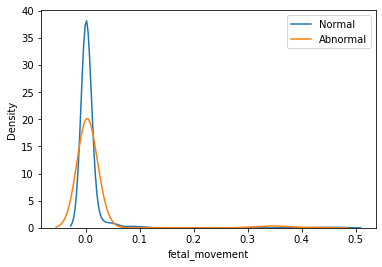

<AxesSubplot:xlabel='uterine_contractions', ylabel='Density'>

<AxesSubplot:xlabel='uterine_contractions', ylabel='Density'>

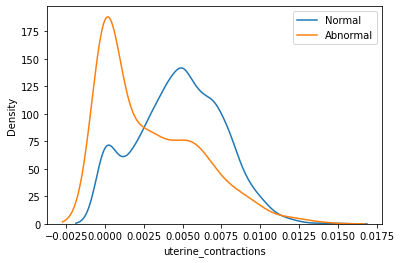

<AxesSubplot:xlabel='light_decelerations', ylabel='Density'>

<AxesSubplot:xlabel='light_decelerations', ylabel='Density'>

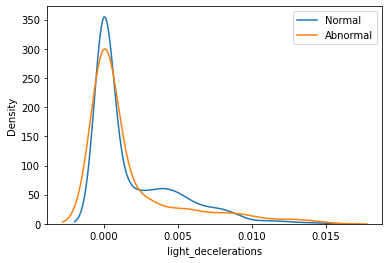

<AxesSubplot:xlabel='severe_decelerations', ylabel='Density'>

<AxesSubplot:xlabel='severe_decelerations', ylabel='Density'>

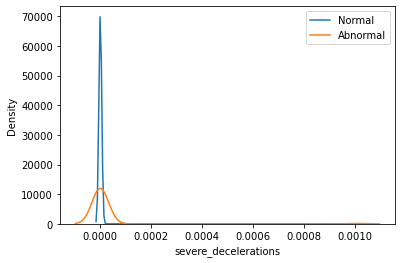

<AxesSubplot:xlabel='prolongued_decelerations', ylabel='Density'>

<AxesSubplot:xlabel='prolongued_decelerations', ylabel='Density'>

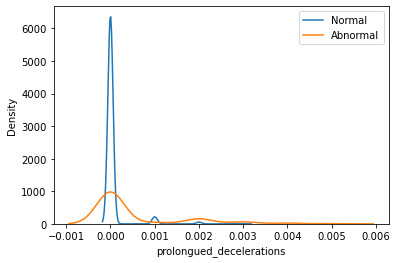

<AxesSubplot:xlabel='abnormal_short_term_variability', ylabel='Density'>

<AxesSubplot:xlabel='abnormal_short_term_variability', ylabel='Density'>

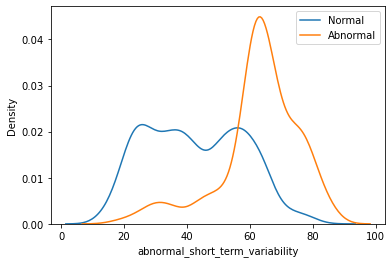

<AxesSubplot:xlabel='percentage_of_time_with_abnormal_long_term_variability', ylabel='Density'>

<AxesSubplot:xlabel='percentage_of_time_with_abnormal_long_term_variability', ylabel='Density'>

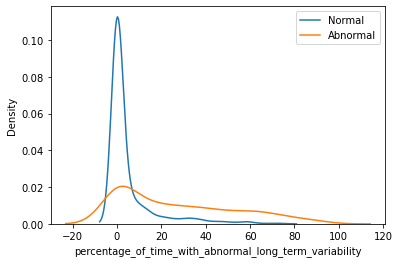

<AxesSubplot:xlabel='mean_value_of_long_term_variability', ylabel='Density'>

<AxesSubplot:xlabel='mean_value_of_long_term_variability', ylabel='Density'>

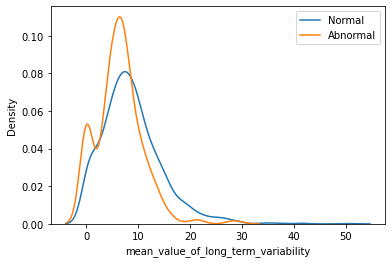

<AxesSubplot:xlabel='histogram_number_of_peaks', ylabel='Density'>

<AxesSubplot:xlabel='histogram_number_of_peaks', ylabel='Density'>

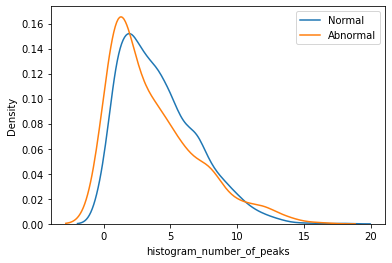

<AxesSubplot:xlabel='histogram_number_of_zeroes', ylabel='Density'>

<AxesSubplot:xlabel='histogram_number_of_zeroes', ylabel='Density'>

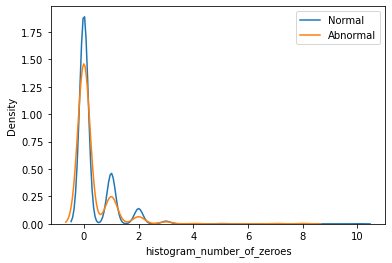

<AxesSubplot:xlabel='histogram_variance', ylabel='Density'>

<AxesSubplot:xlabel='histogram_variance', ylabel='Density'>

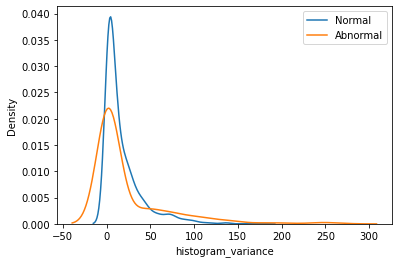

<AxesSubplot:xlabel='histogram_mean', ylabel='Density'>

<AxesSubplot:xlabel='histogram_mean', ylabel='Density'>

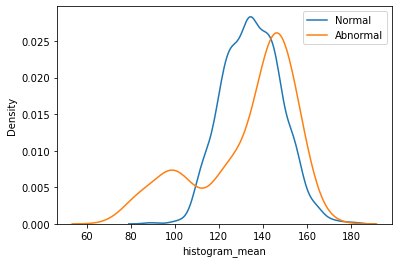

<AxesSubplot:xlabel='mean_value_of_short_term_variability', ylabel='Density'>

<AxesSubplot:xlabel='mean_value_of_short_term_variability', ylabel='Density'>

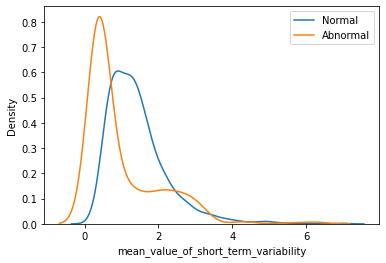

In [10]:
density_plot_vars = [x for x in final_features if x not in ['histogram_tendency']]

for x in density_plot_vars:
    sn.kdeplot(df.loc[df['fetal_health']==1, x], label = 'Normal')
    sn.kdeplot(df.loc[df['fetal_health']==2, x], label = 'Abnormal')
    plt.legend(loc = 'best')
    plt.show()

sn.kdeplot(df.loc[df['fetal_health']==1, 'histogram_mean'], label = 'Normal')
sn.kdeplot(df.loc[df['fetal_health']==2, 'histogram_mean'], label = 'Abnormal')
plt.legend(loc = 'best')
plt.show()
sn.kdeplot(df.loc[df['fetal_health']==1, 'mean_value_of_short_term_variability'], label = 'Normal')
sn.kdeplot(df.loc[df['fetal_health']==2, 'mean_value_of_short_term_variability'], label = 'Abnormal')
plt.legend(loc = 'best')
plt.show()

# Univariate PlotsL
 - accelrations (good)
 - fetal_movement (Less)
 - uterine_contractions (good)
 - light_decelarations (less)
 - severe_decelerations (good)
 - prolonged_decelarations (good)
 - abnormal_short_term_variability (good)
 - percentage_of_time_with_abnormal_long_term_variability (good)
 - mean_value_of_long_term_variability (less)
 - histogram_number_of_peaks (less)
 - histogram_number_of_zeroes (less)
 - Histogram_variance (medium)

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='histogram_tendency'>

<Figure size 720x576 with 0 Axes>

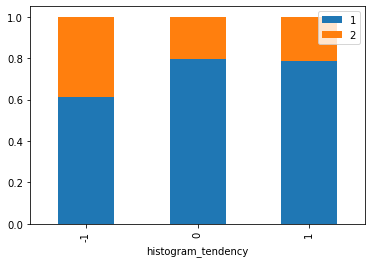

In [11]:
# Looking at histogram tendency
for x in ['histogram_tendency']:
    plt.figure(figsize = (10,8))
    pd.crosstab(df[x] , df['fetal_health']  , normalize='index').plot(kind = 'bar' , stacked='True')
    plt.legend(loc = 'best')

#There seem to be  a higher percentage of abnormal fetus for histogram tendency -1 

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

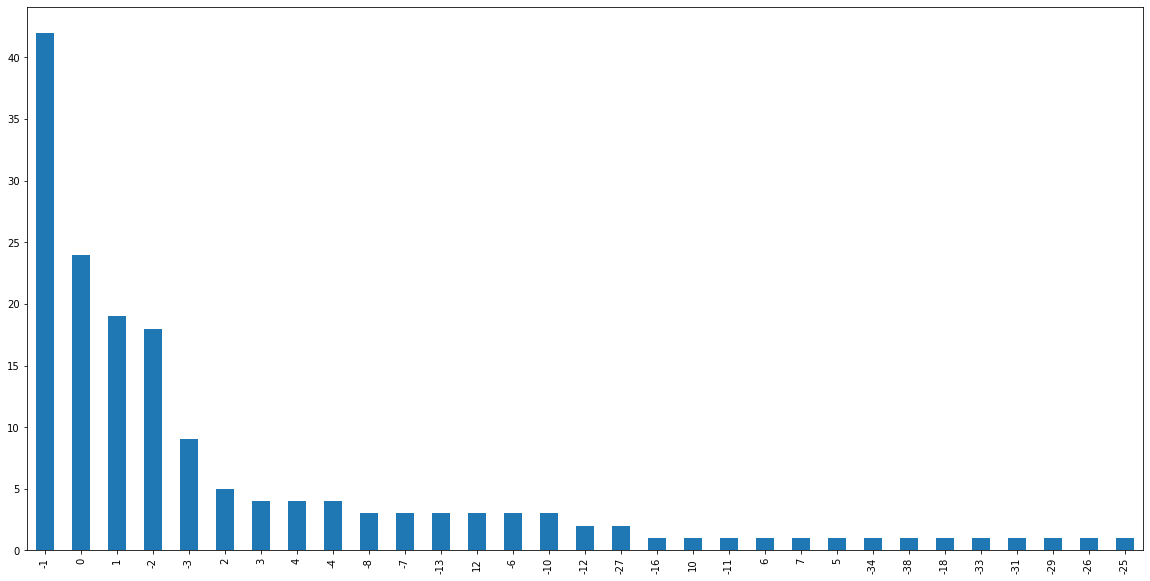

In [12]:
plt.figure(figsize = (20,10))
x = df.loc[df['histogram_tendency']==-1,['histogram_mean', 'histogram_median']]
x['diff'] =  x['histogram_mean'] - x['histogram_median']
x['diff'].value_counts().plot(kind = 'bar')

Data Processing 

In [13]:
df.loc[:,'fetal_health_enc'] = df['fetal_health'].map(lambda x: 0 if x ==1 else 1)
df.loc[:,['fetal_health_enc','fetal_health']].drop_duplicates()

,fetal_health_enc,fetal_health
0,1,2
1,0,1


In [14]:
def scale(x):
    max_ = max(x)
    min_ = min(x)
    x_std = (x-min_)/(max_ - min_)
    return x_std

df_scaled = df.apply(scale).drop("fetal_health",axis = 1)
df_scaled = sm.add_constant(data = df_scaled, prepend = True)
df_scaled.head()

,const,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health_enc
0,1.0,0.259259,0.000000,0.0,0.000000,0.0,0.0,0.0,0.813333,0.044118,0.472527,0.047337,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1.0,1.0
1,1.0,0.481481,0.315789,0.0,0.400000,0.2,0.0,0.0,0.066667,0.279412,0.000000,0.205128,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.5,0.0
2,1.0,0.500000,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.279412,0.000000,0.264300,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5,0.0
3,1.0,0.518519,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.323529,0.000000,0.453649,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0,0.0
4,1.0,0.481481,0.368421,0.0,0.533333,0.0,0.0,0.0,0.053333,0.323529,0.000000,0.392505,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0,0.0


## Splitting Data into Test and Train 

In [15]:
ind = df_scaled.drop("fetal_health_enc", axis = 1)
dep = df_scaled.loc[:,"fetal_health_enc"]

In [16]:
## Splitting the data into dependent and independent variables first
## Creating train and test dataframes
train_x , test_x , train_y , test_y = train_test_split(ind , dep, train_size = 0.7 , random_state = 12)

for x in [train_x , test_x , train_y , test_y]:
    x.shape
train_x.head(2)
test_x.shape

(1488, 22)

(638, 22)

(1488,)

(638,)

,const,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1899,1.0,0.611111,0.473684,0.002079,0.533333,0.400000,0.0,0.0,0.506667,0.176471,0.0,0.285996,0.559322,0.238532,0.482759,0.444444,0.0,0.803150,0.633028,0.642202,0.263941,1.0
1301,1.0,0.555556,0.000000,0.000000,0.333333,0.466667,0.0,0.2,0.173333,0.205882,0.0,0.078895,0.536723,0.091743,0.310345,0.333333,0.0,0.598425,0.486239,0.522936,0.126394,1.0


(638, 22)

# Let's first fit model on entire data and see which variables are insignificant 

In [17]:
import statsmodels.api as sm
# building the model and fitting the data
log_reg = sm.Logit(train_y, train_x).fit()
print(log_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.180238
         Iterations 10
                                             Results: Logit
Model:                           Logit                         Pseudo R-squared:              0.651      
Dependent Variable:              fetal_health_enc              AIC:                           578.3897   
Date:                            2021-10-10 13:36              BIC:                           689.7987   
No. Observations:                1488                          Log-Likelihood:                -268.19    
Df Model:                        20                            LL-Null:                       -768.09    
Df Residuals:                    1467                          LLR p-value:                   4.3134e-199
Converged:                       1.0000                        Scale:                         1.0000     
No. Iterations:                  10.0000                                                       

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

logreg = LogisticRegression(max_iter=3000)
kfold = KFold(n_splits=3, shuffle=True)
score = cross_val_score(estimator=logreg, X=train_x, y= train_y,cv=kfold,scoring='precision')
print("Precision: %.3f%% (%.3f%%)" % (score.mean()*100.0, score.std()*100.0))

score = cross_val_score(estimator=logreg, X=train_x , y= train_y,cv=kfold,scoring='accuracy')
print("Accuracy: %.3f%% (%.3f%%)" % (score.mean()*100.0, score.std()*100.0))

score = cross_val_score(estimator=logreg, X=train_x , y= train_y,cv=kfold,scoring='recall')
print("Recall: %.3f%% (%.3f%%)" % (score.mean()*100.0, score.std()*100.0))

Precision: 81.861% (2.551%)
Accuracy: 90.188% (0.812%)
Recall: 67.998% (6.552%)


In [19]:
## Significant variables
## Adding a conceptual variable

## Adding to Train
a = train_x['uterine_contractions']* train_x['accelerations']
train_x['uterine_contract_accel'] = a
b = train_x['uterine_contractions']* train_x['light_decelerations']
train_x['uterine_contract_light_decel'] = b

## Adding to Test
a = test_x['uterine_contractions']* test_x['accelerations']
test_x['uterine_contract_accel'] = a
b = test_x['uterine_contractions']* test_x['light_decelerations']
test_x['uterine_contract_light_decel'] = b

sig_vars = ['uterine_contractions', 'accelerations', 'prolongued_decelerations', 'abnormal_short_term_variability','percentage_of_time_with_abnormal_long_term_variability', 
 'histogram_mean', 'histogram_variance', 'uterine_contract_accel','light_decelerations','uterine_contract_light_decel','const']
log_reg = sm.Logit(train_y, train_x[sig_vars]).fit()
print(log_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.191581
         Iterations 9
                                             Results: Logit
Model:                           Logit                         Pseudo R-squared:              0.629      
Dependent Variable:              fetal_health_enc              AIC:                           592.1463   
Date:                            2021-10-10 13:36              BIC:                           650.5034   
No. Observations:                1488                          Log-Likelihood:                -285.07    
Df Model:                        10                            LL-Null:                       -768.09    
Df Residuals:                    1477                          LLR p-value:                   3.8565e-201
Converged:                       1.0000                        Scale:                         1.0000     
No. Iterations:                  9.0000                                                         

<ipython-input-19-cc4fb227862f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['uterine_contract_accel'] = a
<ipython-input-19-cc4fb227862f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['uterine_contract_light_decel'] = b
<ipython-input-19-cc4fb227862f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

logreg = LogisticRegression(max_iter=3000)
kfold = KFold(n_splits=3, shuffle=True, random_state= 79)
score = cross_val_score(estimator=logreg, X=train_x[sig_vars], y= train_y,cv=kfold,scoring='precision')
print("Precision: %.3f%% (%.3f%%)" % (score.mean()*100.0, score.std()*100.0))

score = cross_val_score(estimator=logreg, X=train_x[sig_vars] , y= train_y,cv=kfold,scoring='accuracy')
print("Accuracy: %.3f%% (%.3f%%)" % (score.mean()*100.0, score.std()*100.0))

score = cross_val_score(estimator=logreg, X=train_x[sig_vars] , y= train_y,cv=kfold,scoring='recall')
print("Recall: %.3f%% (%.3f%%)" % (score.mean()*100.0, score.std()*100.0))

Precision: 84.963% (3.294%)
Accuracy: 90.255% (1.400%)
Recall: 65.846% (3.245%)


In [21]:
log_reg = sm.Logit(train_y, train_x[sig_vars]).fit()
prob_logistic_reg = log_reg.predict(train_x[sig_vars])

logistic_df = pd.DataFrame({
    'actual': train_y,
    'pred_prob':prob_logistic_reg
})

Optimization terminated successfully.
         Current function value: 0.191581
         Iterations 9


Text(0.5, 0, 'False Positive rate')

Text(0, 0.5, 'True Positive rate')

Text(0.5, 1.0, 'ROC Curve')

0.9659684163520481

0.9659684163520481

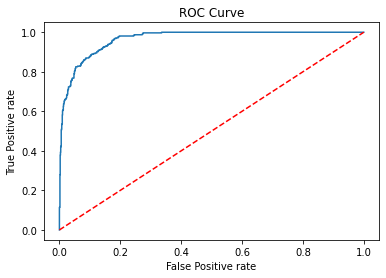

In [22]:
fpr , tpr , threshold = metrics.roc_curve(logistic_df['actual'] , logistic_df['pred_prob'] , drop_intermediate=True)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1] , linestyle = 'dashed' , color ='red')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC Curve")
metrics.auc(fpr,tpr)
metrics.roc_auc_score(logistic_df['actual'] , logistic_df['pred_prob'])


In [23]:
logistic_df

,actual,pred_prob
1899,0.0,0.012871
1301,0.0,0.165602
1915,0.0,0.048041
684,0.0,0.001205
1215,1.0,0.142073
...,...,...
1987,0.0,0.004621
1283,0.0,0.000407
1414,0.0,0.000471
1691,0.0,0.000110


We know that the cost of identifying a FN (abnormal Fetus as Normal) is much more than identifying a FP

In [24]:
## Cost association
C1,C2 = (1,3)

total_cost = []

threshold_range = np.linspace(0.1 , 0.5 , 1000)
for threshold in threshold_range:
    logistic_df['pred_cat'] = logistic_df['pred_prob'].map(lambda x: 1 if x >threshold else 0)
    fp = ((logistic_df['actual'] == 0) & (logistic_df['pred_cat']==1))
    logistic_df['false_positive'] = fp.map(lambda x : 1 if x == True else 0)
    fn = ((logistic_df['actual'] == 1) & (logistic_df['pred_cat']==0))
    logistic_df['false_negative'] = fn.map(lambda x : 1 if x == True else 0)
    
    logistic_df['cost_fp'] = logistic_df['false_positive']*C1
    logistic_df['cost_fn'] = logistic_df['false_negative']*C2
    
    
    total_cost.append(logistic_df['cost_fp'].sum()+ logistic_df['cost_fn'].sum())

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 0, 'Probability Threshold')

Text(0, 0.5, 'Cost')

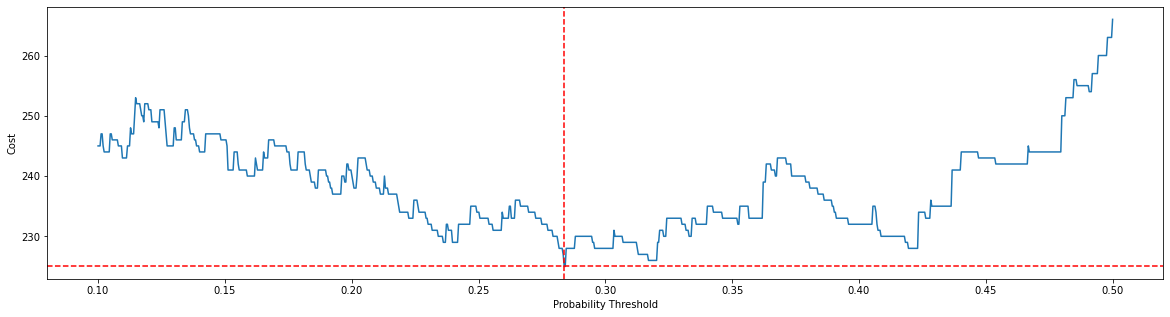

0.28378378378378377


In [25]:
plt.figure(figsize = (20,5))
sn.lineplot(x = threshold_range, y = total_cost)
result = np.where(total_cost == min(total_cost))

plt.axhline(total_cost[result[0][0]], color = 'red', linestyle = 'dashed')
plt.axvline(threshold_range[result[0][0]], color = 'red', linestyle = 'dashed')
plt.xlabel("Probability Threshold")
plt.ylabel("Cost")
plt.show()
final_threshold = threshold_range[result[0][0]]
print(final_threshold)

In [26]:
orignal_class = logistic_df['pred_prob'].map(lambda x: 1 if x >0.5 else 0)
new_class = logistic_df['pred_prob'].map(lambda x: 1 if x >final_threshold else 0)

logistic_df['orignal_class']  = orignal_class
logistic_df['threshold_based_classification']  = new_class

print(metrics.classification_report(logistic_df['actual'], logistic_df['threshold_based_classification']))

print(metrics.classification_report(logistic_df['actual'], logistic_df['orignal_class']))

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94      1173
         1.0       0.73      0.87      0.79       315

    accuracy                           0.90      1488
   macro avg       0.85      0.89      0.87      1488
weighted avg       0.91      0.90      0.91      1488

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      1173
         1.0       0.81      0.78      0.80       315

    accuracy                           0.92      1488
   macro avg       0.88      0.87      0.87      1488
weighted avg       0.91      0.92      0.91      1488



# Feature Importance using Permutation Method

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

sig_vars_2 = ['uterine_contractions', 'accelerations', 'prolongued_decelerations', 'abnormal_short_term_variability','percentage_of_time_with_abnormal_long_term_variability', 
 'histogram_mean', 'histogram_variance','light_decelerations']

clf = LogisticRegression().fit(train_x[sig_vars_2], train_y)
result = permutation_importance(clf, train_x[sig_vars_2], train_y, n_repeats=10,random_state=0)
imp = result.importances_mean

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

Text(0, 0.5, 'Feature Importance')

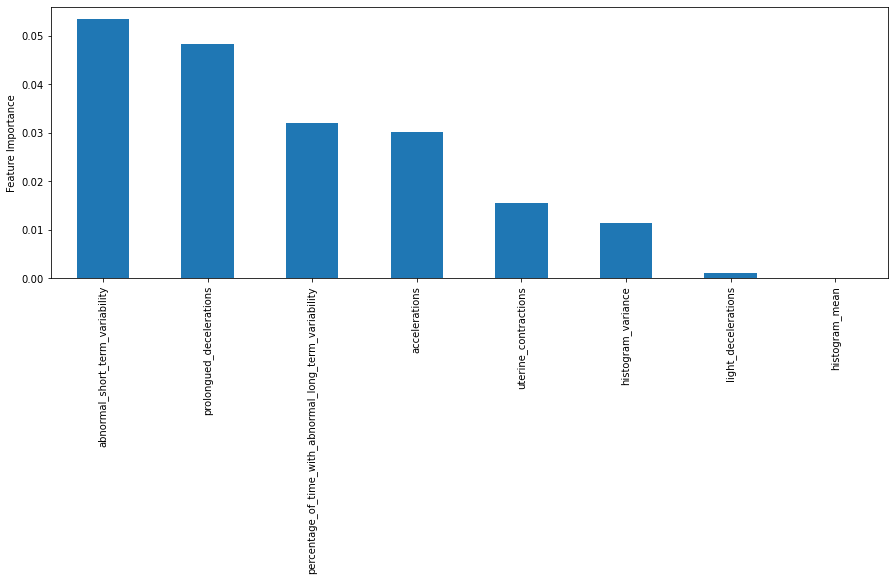

In [28]:
feature_list = pd.Series(imp, index=sig_vars_2)
plt.figure(figsize = (15,5))
feature_list.sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Feature Importance')

In [29]:
## Check on Test Set
prob_logistic_reg = log_reg.predict(test_x[sig_vars])
logistic_test_df = pd.DataFrame({
    'actual': test_y,
    'pred_prob':prob_logistic_reg
})
logistic_test_df['predicted_class'] = logistic_test_df['pred_prob'].map(lambda x: 1 if x > final_threshold else 0)

print(metrics.classification_report(logistic_test_df['actual'], logistic_test_df['predicted_class']))

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92       482
         1.0       0.73      0.87      0.79       156

    accuracy                           0.89       638
   macro avg       0.84      0.88      0.86       638
weighted avg       0.90      0.89      0.89       638



# Feature Importance in Logistic Regression

<Figure size 720x360 with 0 Axes>

<AxesSubplot:>

Text(0, 0.5, 'Feature Importance')

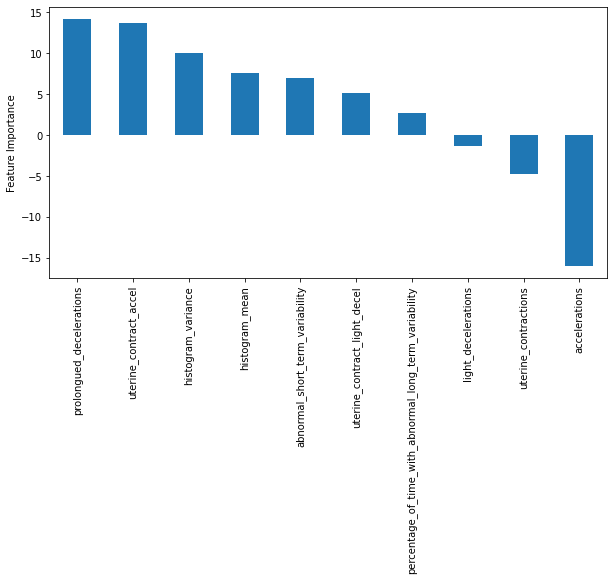

In [30]:
feature_list = pd.Series(log_reg.params.values, index=sig_vars)[:-1]
plt.figure(figsize = (10,5))
feature_list.sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Feature Importance')

# Decision Tree 

In [31]:
train_x.drop(['const','uterine_contract_light_decel', 'uterine_contract_accel'], axis = 1, inplace=True)
test_x.drop(['const','uterine_contract_light_decel', 'uterine_contract_accel'], axis = 1, inplace = True)

C:\Users\arora\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
from sklearn.tree import DecisionTreeClassifier
## Creating the grid parameters to iterate in the model
tuned_parameters = { 'criterion' : ['gini' , 'entropy'] ,
                     'max_depth' : range(2,15)
                   }
## Defining an instance of the GridSearchCV method
clf_tree = DecisionTreeClassifier(random_state= 0, min_samples_split = 10)
clf_accuracy = GridSearchCV(estimator=clf_tree,
             param_grid= tuned_parameters, 
             scoring= 'accuracy', 
             cv = 5)

## Let's fit the model now
clf_accuracy.fit(train_x,train_y)
## Looking at the best fit model
clf_accuracy.best_params_
clf_accuracy.best_score_

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(min_samples_split=10,
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 15)},
             scoring='accuracy')

{'criterion': 'entropy', 'max_depth': 13}

0.9334689173615347

In [33]:
## We now know the optimal parameters, so we will instance a new model with these parameters
DT_classifier = DecisionTreeClassifier(criterion= 'entropy', max_depth=7, random_state=0, min_samples_split=10)
DT_classifier.fit(train_x,train_y)

DTpredition = DT_classifier.predict_proba(train_x).flatten()  
prob_DT_reg=[]
for x in range(len(DTpredition)):
    if x%2 !=0:
        prob_DT_reg.append(list(DTpredition)[x])
prob_DT_reg[0:2]    

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=10,
                       random_state=0)

[0.0, 0.2]

In [34]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

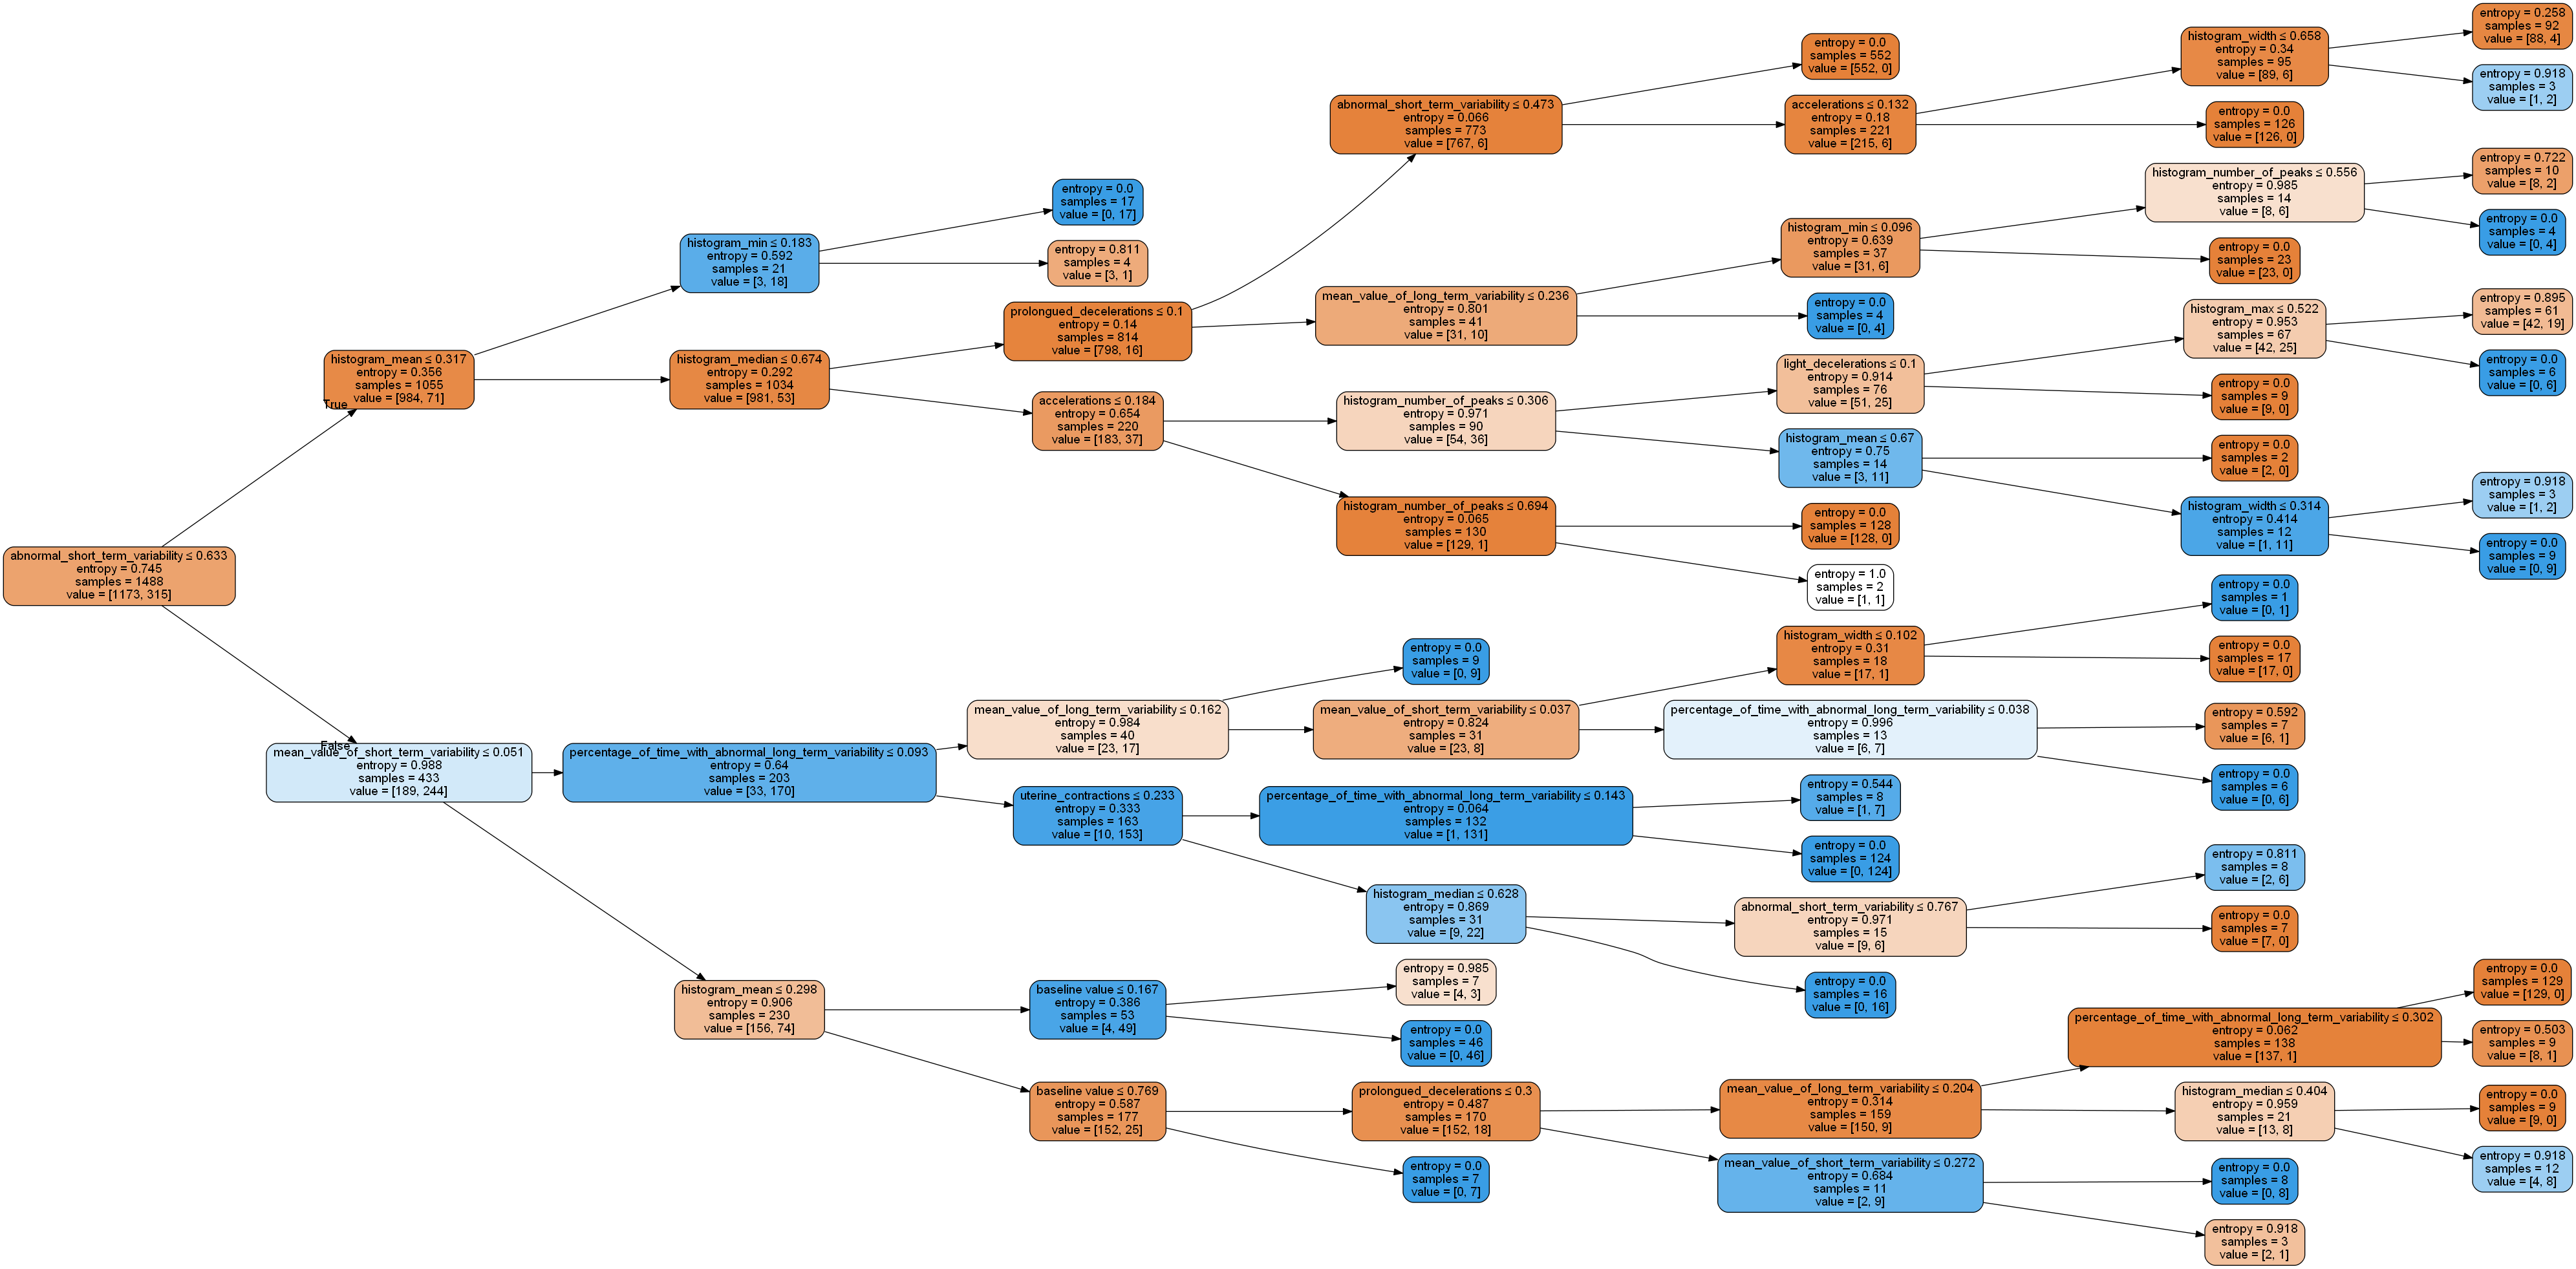

In [35]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DT_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names= train_x.columns , rotate = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [36]:
DT_df = pd.DataFrame({
    'actual': train_y,
    'pred_prob':prob_DT_reg
})
DT_df.head()

,actual,pred_prob
1899,0.0,0.00
1301,0.0,0.20
1915,0.0,0.00
684,0.0,0.00
1215,1.0,0.75


0.9954004790321926

0.9954004790321926

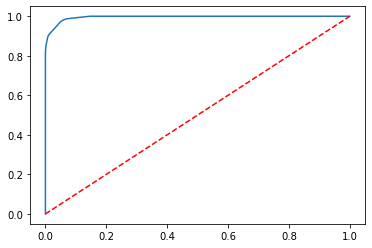

In [37]:
fpr , tpr , threshold = metrics.roc_curve(DT_df['actual'] , DT_df['pred_prob'] , drop_intermediate=True)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1] , linestyle = 'dashed' , color ='red')
metrics.auc(fpr,tpr)
metrics.roc_auc_score(DT_df['actual'] , DT_df['pred_prob'])

In [38]:
total_cost = []

threshold_range = np.linspace(0.1 , 0.5 , 1000)
for threshold in threshold_range:
    DT_df['pred_cat'] = DT_df['pred_prob'].map(lambda x: 1 if x >threshold else 0)
    fp = ((DT_df['actual'] == 0) & (DT_df['pred_cat']==1))
    DT_df['false_positive'] = fp.map(lambda x : 1 if x == True else 0)
    fn = ((DT_df['actual'] == 1) & (DT_df['pred_cat']==0))
    DT_df['false_negative'] = fn.map(lambda x : 1 if x == True else 0)
    
    DT_df['cost_fp'] = DT_df['false_positive']*C1
    DT_df['cost_fn'] = DT_df['false_negative']*C2
    
    
    total_cost.append(DT_df['cost_fp'].sum()+ DT_df['cost_fn'].sum())

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

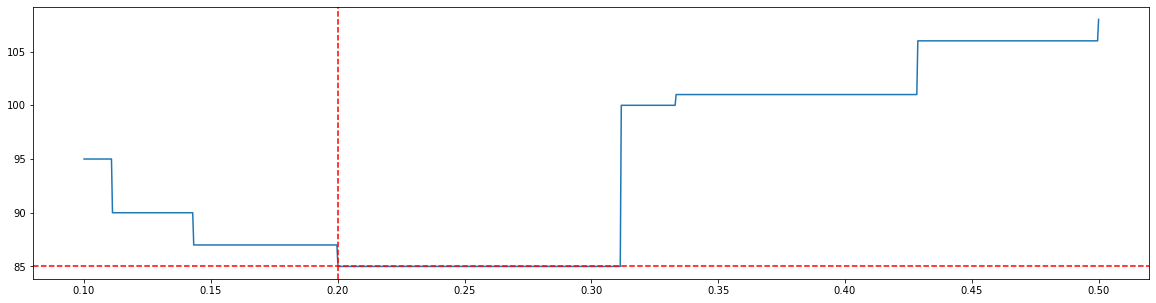

0.2001001001001001


In [39]:
plt.figure(figsize = (20,5))
sn.lineplot(x = threshold_range, y = total_cost)
result = np.where(total_cost == min(total_cost))

plt.axhline(total_cost[result[0][0]], color = 'red', linestyle = 'dashed')
plt.axvline(threshold_range[result[0][0]], color = 'red', linestyle = 'dashed')
plt.show()
final_threshold = threshold_range[result[0][0]]
print(final_threshold)

In [40]:
orignal_class = DT_df['pred_prob'].map(lambda x: 1 if x >0.5 else 0)
new_class = DT_df['pred_prob'].map(lambda x: 1 if x >final_threshold else 0)

DT_df['orignal_class']  = orignal_class
DT_df['threshold_based_classification']  = new_class

print(metrics.classification_report(DT_df['actual'], DT_df['threshold_based_classification']))

print(metrics.classification_report(DT_df['actual'], DT_df['orignal_class']))

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1173
         1.0       0.83      0.97      0.90       315

    accuracy                           0.95      1488
   macro avg       0.91      0.96      0.93      1488
weighted avg       0.96      0.95      0.95      1488

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1173
         1.0       0.97      0.90      0.93       315

    accuracy                           0.97      1488
   macro avg       0.97      0.94      0.96      1488
weighted avg       0.97      0.97      0.97      1488



In [41]:
DTpredition = DT_classifier.predict_proba(test_x).flatten()  
prob_DT_reg=[]
for x in range(len(DTpredition)):
    if x%2 !=0:
        prob_DT_reg.append(list(DTpredition)[x])
prob_DT_reg[0:2]    

[0.0, 0.0]

In [42]:
## Check on Test Set

DT_test_df = pd.DataFrame({
    'actual': test_y,
    'pred_prob':prob_DT_reg
})
DT_test_df.head()

DT_test_df['predicted_class'] = DT_test_df['pred_prob'].map(lambda x: 1 if x > final_threshold else 0)

print(metrics.classification_report(DT_test_df['actual'], DT_test_df['predicted_class']))

,actual,pred_prob
1649,0.0,0.0
1971,0.0,0.0
1264,0.0,0.0
1103,0.0,0.0
1009,0.0,0.0


              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       482
         1.0       0.81      0.91      0.86       156

    accuracy                           0.93       638
   macro avg       0.89      0.92      0.90       638
weighted avg       0.93      0.93      0.93       638



<Figure size 864x576 with 0 Axes>

<BarContainer object of 21 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

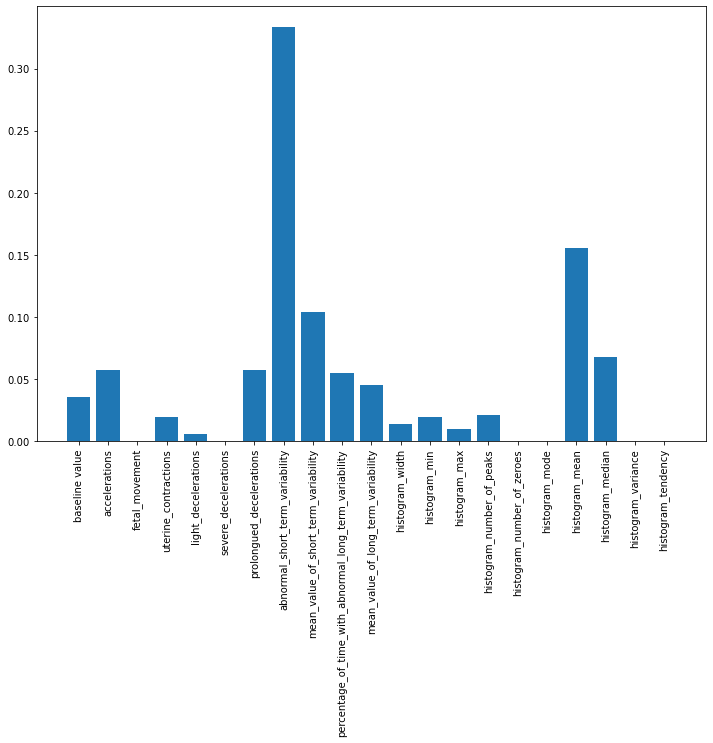

In [43]:
plt.figure(figsize = (12,8))
importance = DT_classifier.feature_importances_
# plot feature importance
plt.bar([x for x in list(test_x.columns)], importance)
plt.xticks(rotation=  '90')
plt.show()

<Figure size 720x360 with 0 Axes>

<AxesSubplot:>

Text(0, 0.5, 'Feature Importance')

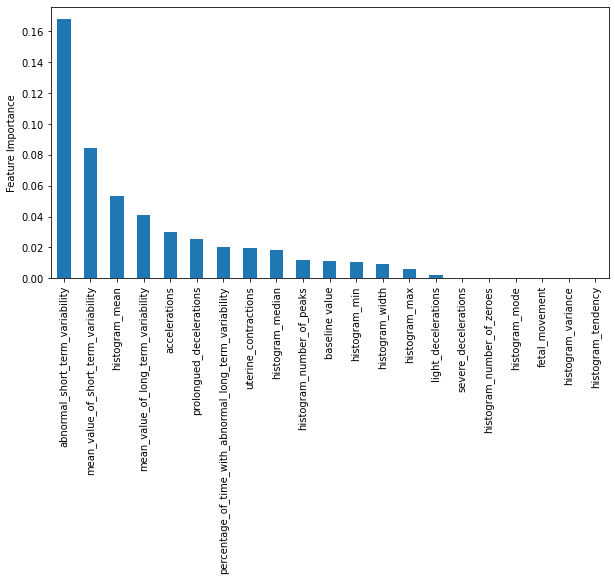

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

clf = DecisionTreeClassifier(criterion= 'entropy', max_depth=7, random_state=0, min_samples_split=10).fit(train_x, train_y)
result = permutation_importance(clf, train_x, train_y, n_repeats=10,random_state=0)
imp = result.importances_mean

feature_list = pd.Series(imp, index=list(train_x.columns))
plt.figure(figsize = (10,5))
feature_list.sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Feature Importance')

# Random Forest 

In [45]:
from sklearn.ensemble import RandomForestClassifier

## Creating the grid parameters to iterate in the model
tuned_parameters = { 'criterion' : ['gini'] ,
                     
                    'max_features': [2,3,4,5,6,7,8,9,10,11,12],
                    'n_estimators': [200,300,400,500,600,700]
                   }
## Defining an instance of the GridSearchCV method
clf_tree = RandomForestClassifier(random_state= 16)
clf = GridSearchCV(estimator=clf_tree,
             param_grid= tuned_parameters, 
             scoring= 'accuracy', 
             cv = 5)

## Let's fit the model now
clf.fit(train_x,train_y)
## Looking at the best fit model
clf.best_params_
clf.best_score_

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=16),
             param_grid={'criterion': ['gini'],
                         'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'n_estimators': [200, 300, 400, 500, 600, 700]},
             scoring='accuracy')

{'criterion': 'gini', 'max_features': 11, 'n_estimators': 400}

0.9543014032946919

In [46]:
## We now know the optimal parameters, so we will instance a new model with these parameters
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(criterion= 'gini', max_features=11, random_state=0, n_estimators = 400)
RF_classifier.fit(train_x,train_y)

RFpredition = RF_classifier.predict_proba(train_x).flatten()  
prob_RF_reg=[]
for x in range(len(RFpredition)):
    if x%2 !=0:
        prob_RF_reg.append(list(RFpredition)[x])
prob_RF_reg[0:2]    

RandomForestClassifier(max_features=11, n_estimators=400, random_state=0)

[0.005, 0.03]

In [47]:
RF_df = pd.DataFrame({
    'actual': train_y,
    'pred_prob':prob_RF_reg
})
RF_df.head()

,actual,pred_prob
1899,0.0,0.0050
1301,0.0,0.0300
1915,0.0,0.0000
684,0.0,0.0100
1215,1.0,0.8775


0.9999986468017159

0.9999986468017159

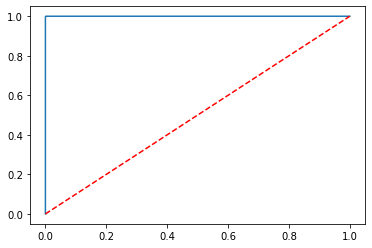

In [48]:
fpr , tpr , threshold = metrics.roc_curve(RF_df['actual'] , RF_df['pred_prob'] , drop_intermediate=True)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1] , linestyle = 'dashed' , color ='red')
metrics.auc(fpr,tpr)
metrics.roc_auc_score(RF_df['actual'] , RF_df['pred_prob'])

In [49]:
total_cost = []

threshold_range = np.linspace(0.1 , 0.5 , 1000)
for threshold in threshold_range:
    RF_df['pred_cat'] = RF_df['pred_prob'].map(lambda x: 1 if x >threshold else 0)
    fp = ((RF_df['actual'] == 0) & (RF_df['pred_cat']==1))
    RF_df['false_positive'] = fp.map(lambda x : 1 if x == True else 0)
    fn = ((RF_df['actual'] == 1) & (RF_df['pred_cat']==0))
    RF_df['false_negative'] = fn.map(lambda x : 1 if x == True else 0)
    
    RF_df['cost_fp'] = RF_df['false_positive']*C1
    RF_df['cost_fn'] = RF_df['false_negative']*C2
    
    
    total_cost.append(RF_df['cost_fp'].sum()+ RF_df['cost_fn'].sum())

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

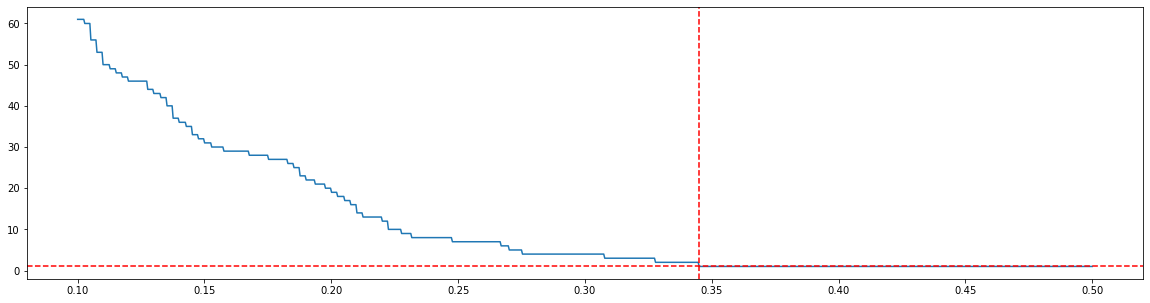

0.3450450450450451


In [50]:
plt.figure(figsize = (20,5))
sn.lineplot(x = threshold_range, y = total_cost)
result = np.where(total_cost == min(total_cost))

plt.axhline(total_cost[result[0][0]], color = 'red', linestyle = 'dashed')
plt.axvline(threshold_range[result[0][0]], color = 'red', linestyle = 'dashed')
plt.show()
final_threshold = threshold_range[result[0][0]]
print(final_threshold)

In [51]:
orignal_class = RF_df['pred_prob'].map(lambda x: 1 if x >0.5 else 0)
new_class = RF_df['pred_prob'].map(lambda x: 1 if x >final_threshold else 0)

RF_df['orignal_class']  = orignal_class
RF_df['threshold_based_classification']  = new_class

print(metrics.classification_report(RF_df['actual'], RF_df['threshold_based_classification']))

print(metrics.classification_report(RF_df['actual'], RF_df['orignal_class']))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1173
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00      1488
   macro avg       1.00      1.00      1.00      1488
weighted avg       1.00      1.00      1.00      1488

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1173
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00      1488
   macro avg       1.00      1.00      1.00      1488
weighted avg       1.00      1.00      1.00      1488



[0.03, 0.0]

,actual,pred_prob
1649,0.0,0.03
1971,0.0,0.00
1264,0.0,0.00
1103,0.0,0.00
1009,0.0,0.05


              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       482
         1.0       0.86      0.92      0.89       156

    accuracy                           0.94       638
   macro avg       0.92      0.93      0.93       638
weighted avg       0.95      0.94      0.94       638



<Figure size 864x576 with 0 Axes>

<BarContainer object of 21 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

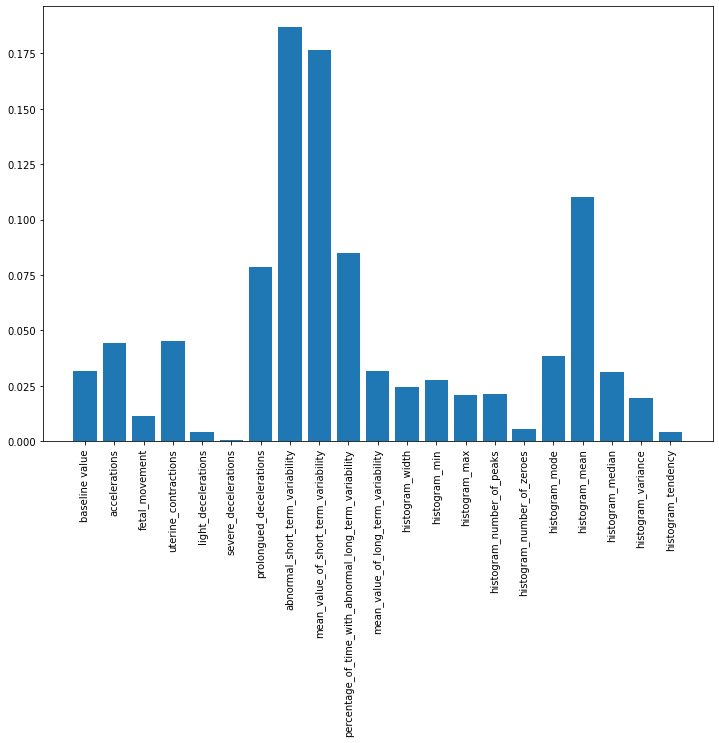

In [52]:
RFpredition = RF_classifier.predict_proba(test_x).flatten()  
prob_RF_reg=[]
for x in range(len(RFpredition)):
    if x%2 !=0:
        prob_RF_reg.append(list(RFpredition)[x])
prob_RF_reg[0:2]    

## Check on Test Set

RF_test_df = pd.DataFrame({
    'actual': test_y,
    'pred_prob':prob_RF_reg
})
RF_test_df.head()

RF_test_df['predicted_class'] = RF_test_df['pred_prob'].map(lambda x: 1 if x > final_threshold else 0)

print(metrics.classification_report(RF_test_df['actual'], RF_test_df['predicted_class']))

plt.figure(figsize = (12,8))
importance = RF_classifier.feature_importances_
# plot feature importance
plt.bar([x for x in list(test_x.columns)], importance)
plt.xticks(rotation=  '90')
plt.show()

<Figure size 720x360 with 0 Axes>

<AxesSubplot:>

Text(0, 0.5, 'Feature Importance')

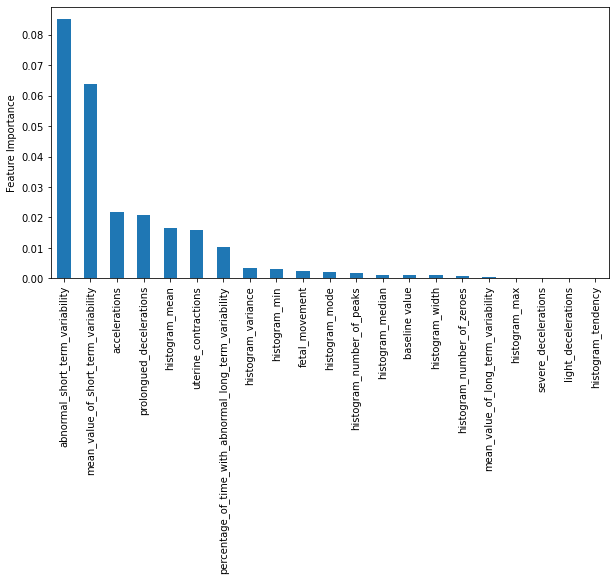

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

clf = RandomForestClassifier(criterion= 'gini', max_features=11, random_state=0, n_estimators = 400).fit(train_x, train_y)
result = permutation_importance(clf, train_x, train_y, n_repeats=10,random_state=0)
imp = result.importances_mean

feature_list = pd.Series(imp, index=list(train_x.columns))
plt.figure(figsize = (10,5))
feature_list.sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Feature Importance')